In [1]:
import os
import imageio
import matplotlib
import numpy as np
import pandas as pd
from skimage import feature
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#Used when reading images
letterDict={
  "a": 0,"b": 1,"c": 2,"d": 3,"e": 4,"f": 5,"g": 6,"h": 7,"i": 8,
    "j": 9,"k": 10,"l": 11,"m": 12,"n": 13,"o": 14,"p": 15,"q": 16,"r": 17,
    "s": 18,"t": 19,"u": 20,"v": 21,"w": 22,"x": 23,"y": 24,"z": 25}

#Used when printing images
numberDict={
    0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H", 8:"I",
    9:"J", 10:"K", 11:"L", 12:"M", 13:"N", 14:"O", 15:"P", 16:"Q", 17:"R",
    18:"S", 19:"T", 20:"U", 21:"V", 22:"W", 23:"X", 24:"Y", 25:"Z"}


def readPicture(df_complete, directory,letter_value):
    im = imageio.imread(directory)
    im.shape
    print("Letter value: ", directory, end="\r")

    im=np.reshape(im,400)
    df = pd.DataFrame(data=im).T
    y = np.repeat(0,400)
    df['Letter'] = letter_value
    
    return df_complete.append(df, ignore_index=True)

#Method ment for adding augmented pictures to a dataset
def addPictureToDataset(dataset, picture, letter_value):
    picture = np.reshape(picture,400)
    df = pd.DataFrame(data=picture).T
    df['Letter'] = letter_value
    return dataset.append(df, ignore_index=True)

In [3]:

def read_all_images(upper_directory):
    number_of_images = 0
    original_imgs = pd.DataFrame()
    aug20 = pd.DataFrame()
    aug90 = pd.DataFrame()
    aug270 = pd.DataFrame()
    aug320 = pd.DataFrame()
    for subdir, dirs, files in os.walk(upper_directory):
        for file in files:
            number_of_images+=1
            #print os.path.join(subdir, file)
            filepath = subdir + os.sep + file
            if filepath.endswith(".jpg"):
                # print(filepath)
                # Rotate every image that is being loaded:
            
                x = filepath.split("/")
                rotate20 = rotate_image(filepath,x[-1],20)
                rotate90 = rotate_image(filepath,x[-1],90)
                rotate270 = rotate_image(filepath,x[-1],270)
                rotate320 = rotate_image(filepath,x[-1],320)
                                
                # The label for the data:
                letter = (x[-1][0])
                letter_val = letterDict.get(letter)
                original_imgs = readPicture(original_imgs,filepath,letter_val)
                aug20 = addPictureToDataset(aug20, rotate20, letter_val)
                aug90 = addPictureToDataset(aug90, rotate90, letter_val)
                aug270 = addPictureToDataset(aug270, rotate270, letter_val)
                aug320 = addPictureToDataset(aug320, rotate320, letter_val)
    print("image")
    # vv.imshow("./dataset3/chars74k-lite/augmented/rotated_neg_a102.jpg")
    print("number_of_images", number_of_images)
    return original_imgs, aug20, aug90, aug270, aug320


#Rotates an image, stores it in a folder and returns the rotated image
def rotate_image(image_path,ending,deg):
    out_path = "./dataset3/augmented/"
    image_to_rotate = plt.imread(image_path)
    
    # Rotating the image:
    rotated_positive = ndimage.rotate(image_to_rotate, deg, reshape=False)
   
    fullpath = os.path.join(out_path, 'rotated_'+ str(deg) + '_' + ending)
    imageio.imwrite(fullpath, rotated_positive)
    return rotated_positive


In [4]:
# Load unaugmented data, no feature selection:            
original_raw, aug20, aug90, aug270, aug320 = read_all_images("./dataset3/chars74k-lite")
#original_raw

imager value:  ./dataset3/chars74k-lite/w/w_42.jpgg./dataset3/chars74k-lite/u/u_11.jpg ./dataset3/chars74k-lite/i/i_40.jpg./dataset3/chars74k-lite/f/f_90.jpg
number_of_images 7113


In [5]:
#Method prints a letter from a panda dataset. 
#Input must be a single row from a panda dataset (a_letter = data.iloc[0])
def printLetter(letter):
    numpy_letter = letter[0:-1].values
    plt.imshow(numpy_letter.reshape(20,20), cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.title('Supposed to be {}'.format(numberDict.get(letter['Letter'])), fontsize=20)
    plt.show()
    return


#Method prints to dataset to compare actual image to edge detected image
def printFromStartToStop(start, stop, data1, data2):
    array = np.arange(start, stop)
    for i in range(array.size):
        printLetter(data1.iloc[array[i]])
        printLetter(data2.iloc[array[i]])
    return



## Scaling Methods

In [6]:
#Scale features using StandardScaler. Assumes the features are from 0 to 399.

#The scaled values are not between -1 and 1. This is strange and may
#indicate that this scaler is not working out.
def standardScaling(data):
    scaled_data = pd.DataFrame()
    scaler = preprocessing.StandardScaler()
    features = np.arange(400)
    for i in range(data.shape[0]):
        print("StandardScaling Data: {}".format(i), end="\r")
        letter = data['Letter'].iloc[i]
        im = data[features].iloc[i].values
        im = im.reshape(20,20)
        im = im.astype(float)
        scaled_im = scaler.fit_transform(im)
        scaled_data = addPictureToDataset(scaled_data, scaled_im, letter)
    return scaled_data


#Scale features using MinMaxScaler. Assumes the features are from 0 to 399.
def minMaxScaling(data):
    scaled_data = pd.DataFrame()
    scaler = preprocessing.MinMaxScaler()
    features = np.arange(400)
    for i in range(data.shape[0]):
        print("MinMaxScaling Data: {}".format(i), end="\r")
        letter = data['Letter'].iloc[i]
        im = data[features].iloc[i].values
        im = im.reshape(20,20)
        im = im.astype(float)
        scaled_im = scaler.fit_transform(im)
        scaled_data = addPictureToDataset(scaled_data, scaled_im, letter)
    return scaled_data


#Divides all features by 255 to get a number between 0 and 1. 
#Not a preferred method.
def simpleScale(data):
    scaled_data = pd.DataFrame()
    features = np.arange(400)
    for i in range(data.shape[0]):
        print("Simply Scaling Data: {}".format(i), end="\r")
        letter = data['Letter'].iloc[i]
        im = data[features].iloc[i].values
        im = im.reshape(20,20)
        im = im.astype(float)
        scaled_im = im/255
        scaled_data = addPictureToDataset(scaled_data, scaled_im, letter)
    return scaled_data


In [7]:
#Load scaled datasets:
std_scaled_data = standardScaling(original_raw)
min_max_data = minMaxScaling(original_raw)

#The simpleScale method is not so useful
#simple_data = simpleScale(original_raw)

#std_scaled_data
#min_max_data

In [8]:
#Methood merges dataset1 with dataset2
#Used to merge originale dataset with augmented datasets
def mergeData(dataset1, dataset2):
    return dataset1.append(dataset2, ignore_index=True)

mergedData = mergeData(original_raw, aug20)
mergedData = mergeData(mergedData, aug90)
mergedData = mergeData(mergedData, aug270)
mergedData = mergeData(mergedData, aug320)
#mergedData

In [9]:
#Splitting dataset such that we get 80/20 for each letter
def get_train_test_set(data):
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    
    for i in range(26):
        train, test = train_test_split(data.loc[data['Letter']==i], test_size=0.2, shuffle=True)
        
        train_set = train_set.append([train], ignore_index=True)
        test_set = test_set.append([test], ignore_index=True)
    return train_set, test_set


train_set, test_set = get_train_test_set(mergedData)

In [10]:

#Edge detector. Use the original dataset as input (not scaled)
# sigma_value is a float between 0 and 3. sigma_value=1 is preferred 
def detectEdges(data, sigma_value):
    edgeDetected_data = pd.DataFrame()
    features = np.arange(400)
    for i in range(data.shape[0]):
        print("Detecting Edge in Dataset: {}".format(i), end="\r")
        letter = data['Letter'].iloc[i]
        numpy_data = data[features].iloc[i].values
        im = numpy_data.reshape(20,20)
        edge_im = feature.canny(im, sigma=sigma_value)
        edge_im = edge_im.astype(float)
        edgeDetected_data = addPictureToDataset(edgeDetected_data, edge_im, letter)
    return edgeDetected_data


## Testing Methods:

In [11]:
data_edges_sigma1_org = detectEdges(original_raw, 1)
data_edges_sigma15_org = detectEdges(original_raw, 1.5)
data_edges_sigma1_aug90 = detectEdges(aug90, 1)
data_edges_sigma1_aug20 = detectEdges(aug20, 1)


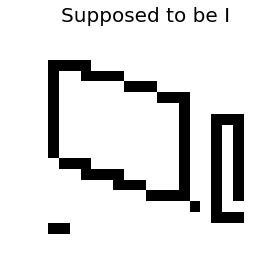

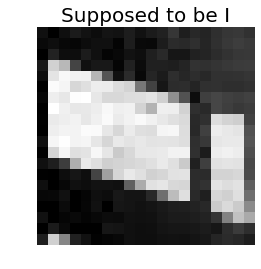

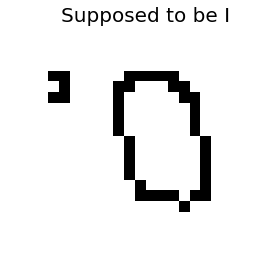

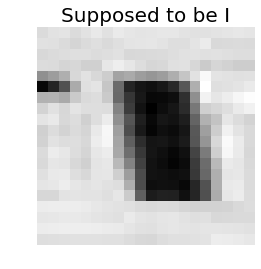

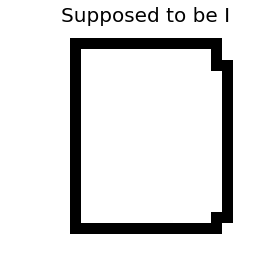

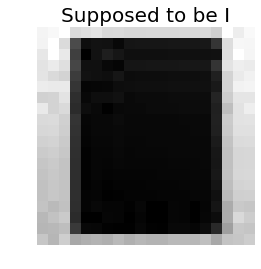

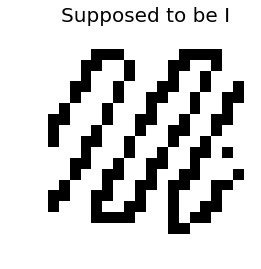

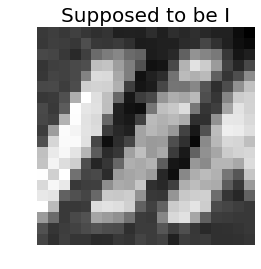

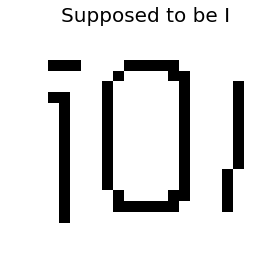

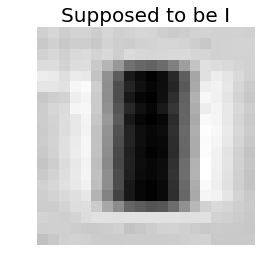

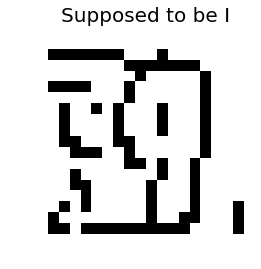

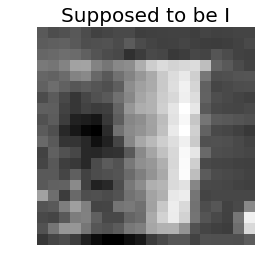

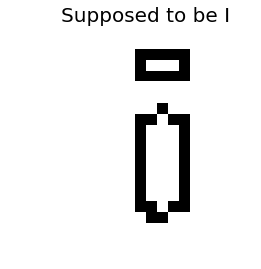

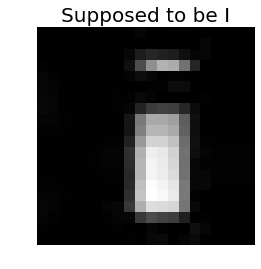

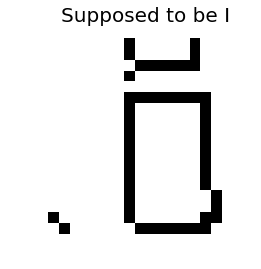

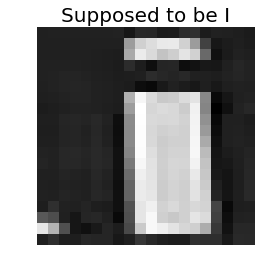

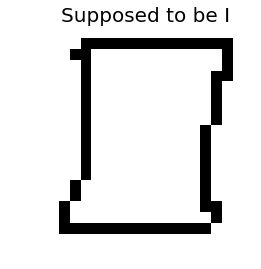

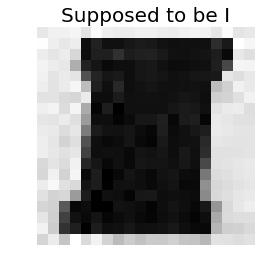

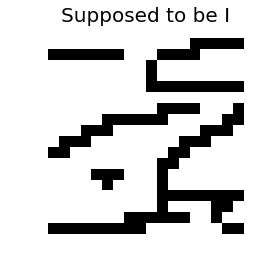

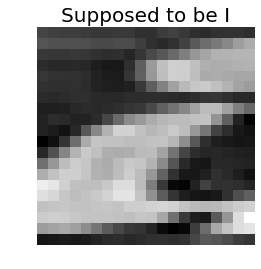

In [12]:
printFromStartToStop(700, 710, data_edges_sigma1_org, original_raw)

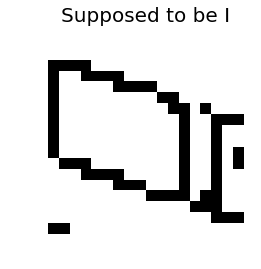

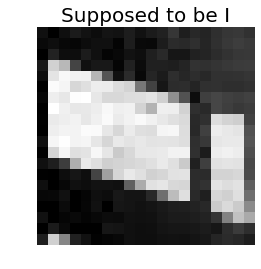

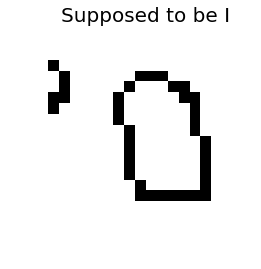

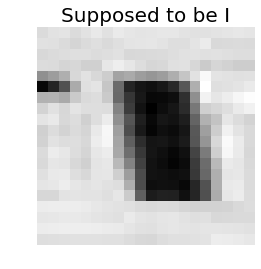

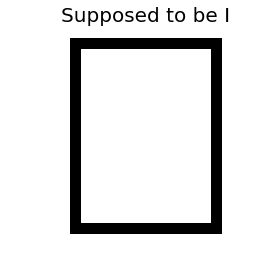

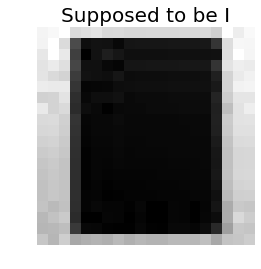

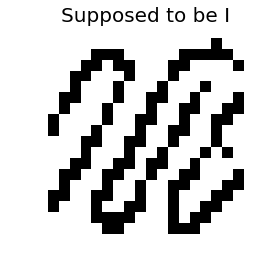

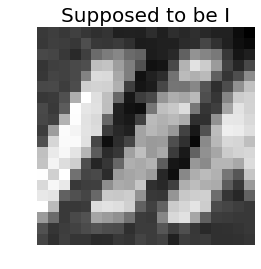

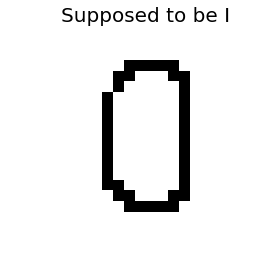

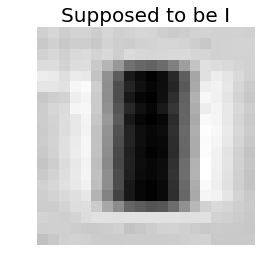

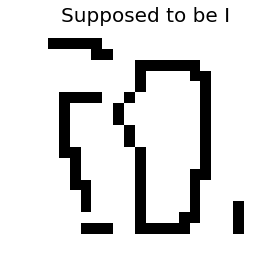

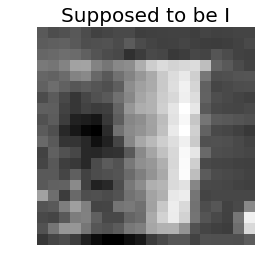

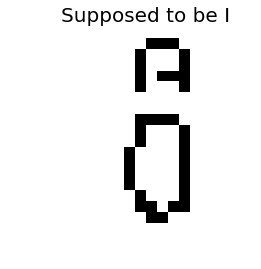

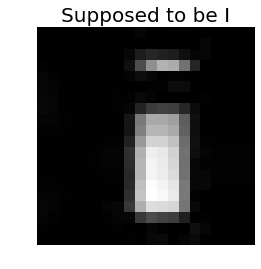

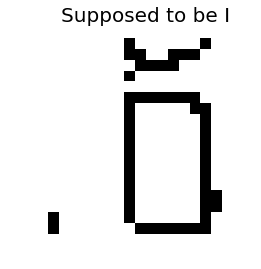

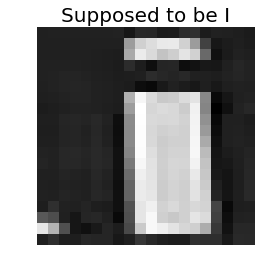

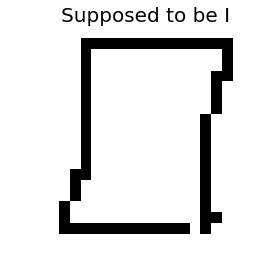

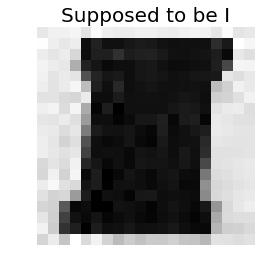

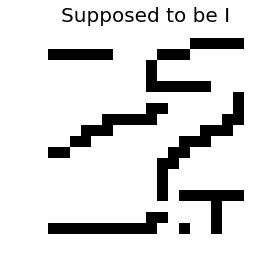

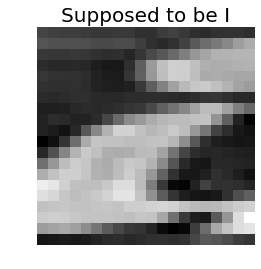

In [13]:
printFromStartToStop(700, 710, data_edges_sigma15_org, original_raw)

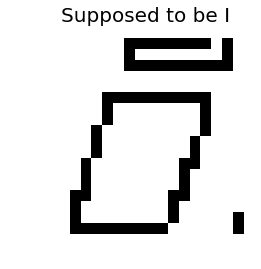

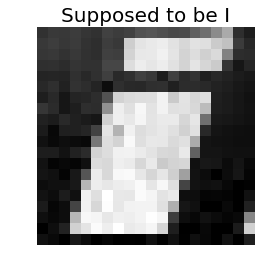

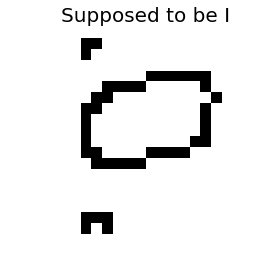

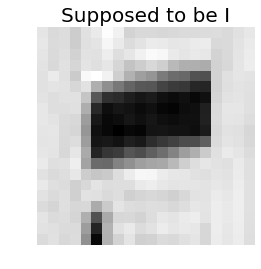

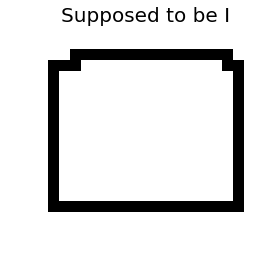

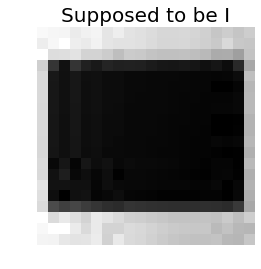

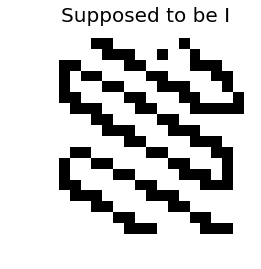

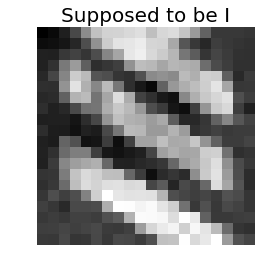

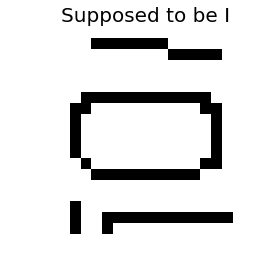

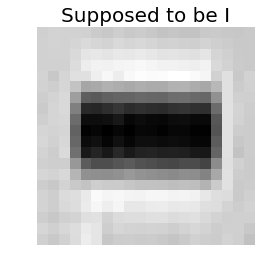

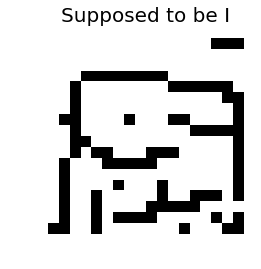

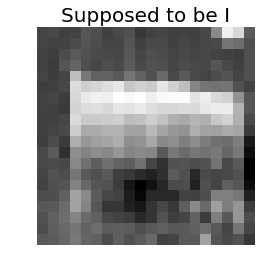

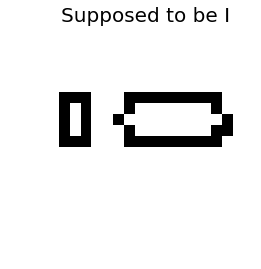

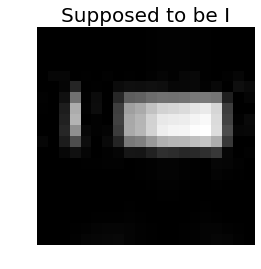

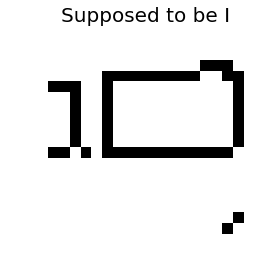

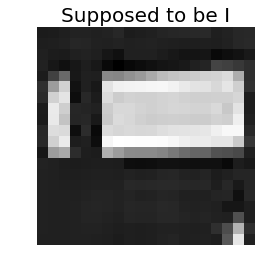

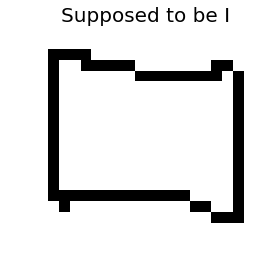

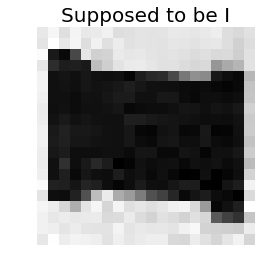

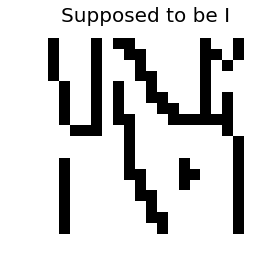

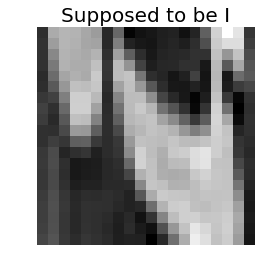

In [14]:
printFromStartToStop(700, 710, data_edges_sigma1_aug90, aug90)

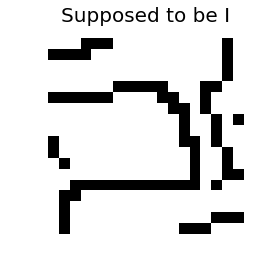

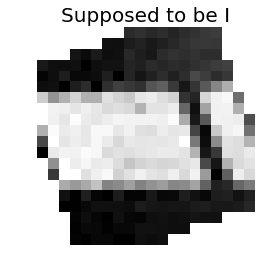

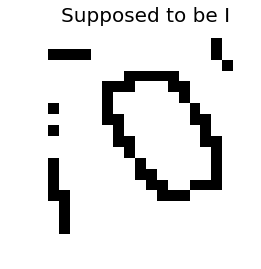

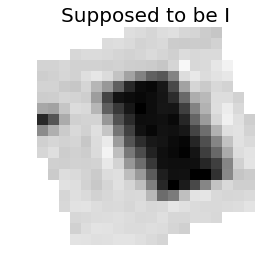

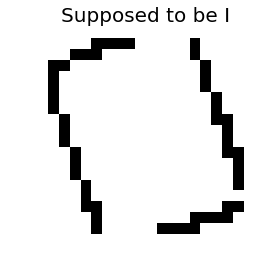

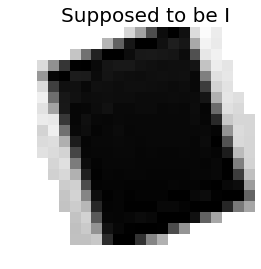

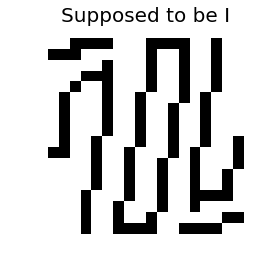

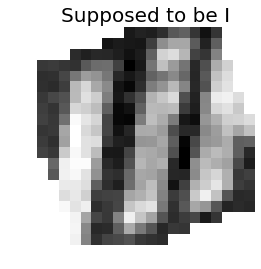

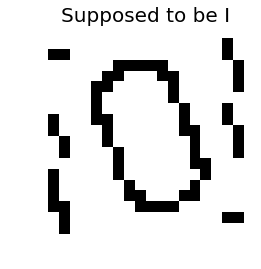

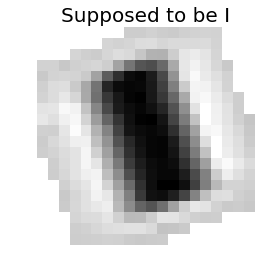

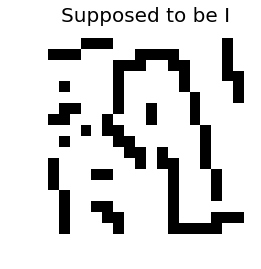

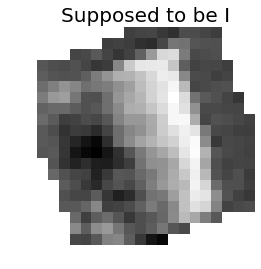

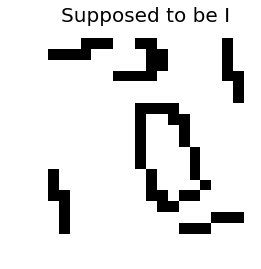

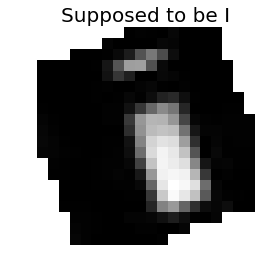

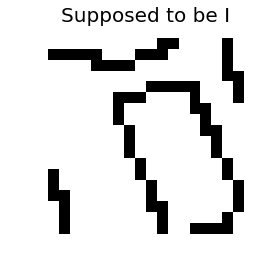

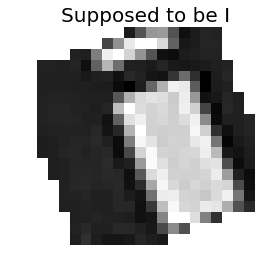

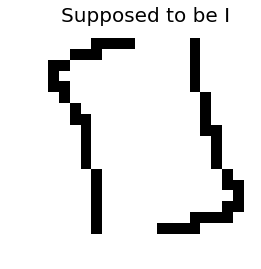

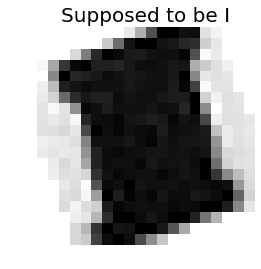

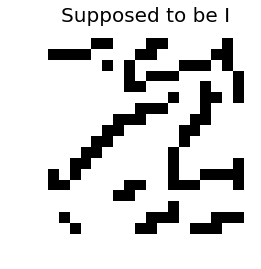

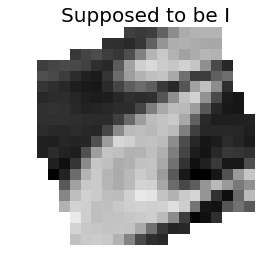

In [15]:
printFromStartToStop(700, 710, data_edges_sigma1_aug20, aug20)